# Taller 10: Nube de palabras

In [4]:
import pandas as pd

import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [5]:
data = pd.read_csv("D:/KL/NLP/Taller 10/tripadvisor_hotel_reviews.csv")
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


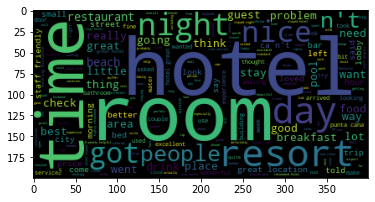

In [6]:
palabras = data.Review.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

In [7]:
import re 

stopwords.append("hotel")

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.Review.apply(lambda texto: pre_procesado(texto))

data.head()

,Review,Rating,pp
0,nice hotel expensive parking got good deal sta...,4,nice expensive parking got good deal stay anni...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience monaco seattle good n le...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time monaco locati...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


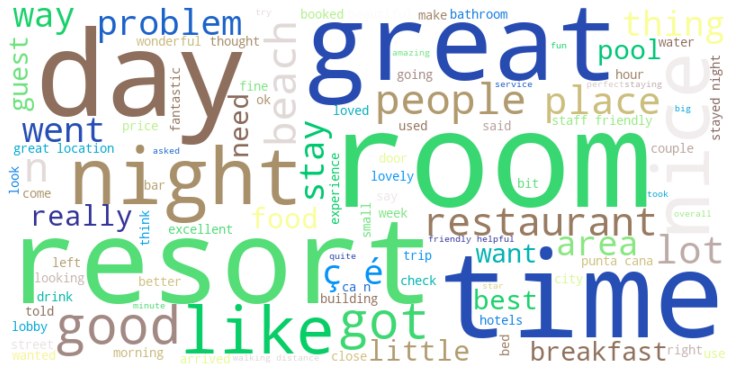

In [23]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="terrain",
                      stopwords=stopwords, collocations=True).generate(palabras)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

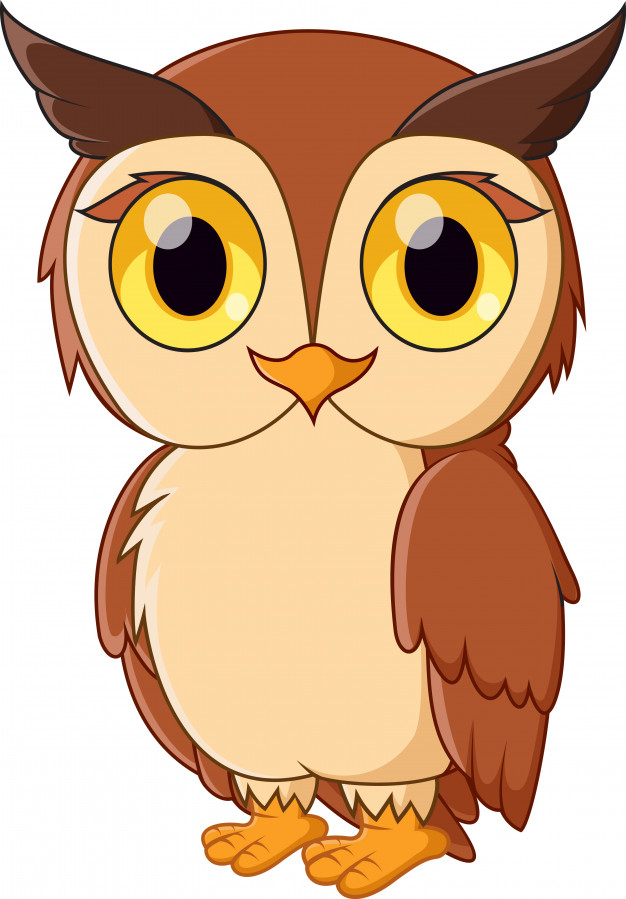

In [36]:
img = PIL.Image.open("D:/KL/NLP/Taller 10/Buho.jpg")
display(img)

In [37]:
mask = np.array(img)
mask

array([[[171, 169, 170],
        [248, 246, 247],
        [252, 252, 252],
        ...,
        [254, 255, 255],
        [249, 249, 249],
        [252, 252, 252]],

       [[127, 125, 126],
        [149, 147, 148],
        [255, 254, 255],
        ...,
        [252, 254, 253],
        [255, 254, 255],
        [185, 183, 184]],

       [[106, 104, 105],
        [ 43,  41,  42],
        [221, 219, 220],
        ...,
        [250, 252, 251],
        [171, 169, 170],
        [109, 107, 108]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]]

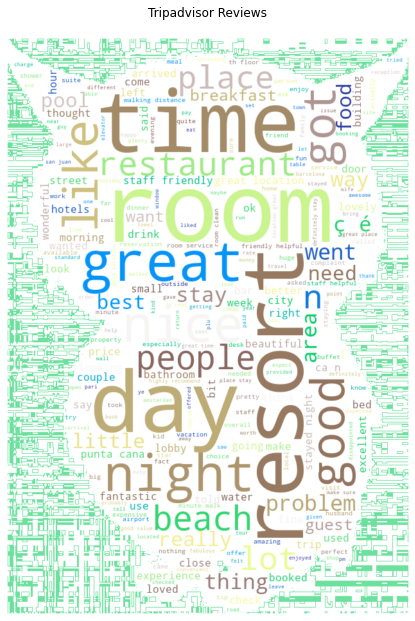

In [51]:
palabras = data.pp.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='terrain',
                     stopwords=stopwords,
                     mask=mask, contour_width=1, contour_color='#6ce09d').generate(palabras)
wordcloud.to_file("buho.png")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Tripadvisor Reviews\n")
plt.show()